Importing required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, Input, Concatenate, Add
from keras.models import Sequential, Model
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.feature_selection import RFE
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, classification_report

Importing the NSL KDD dataset and naming the Feature columns

In [2]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty_level"]

In [3]:
data = pd.read_csv(r"C:\Documents\Documents\Germany\1SRH\Thesis\Dataset\KDDTrain+.txt",header=None, names=col_names)
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [4]:
data.shape

(125973, 43)

In [5]:
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty_level
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [6]:
#Checking Missing Values
data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [7]:
data['label'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

Categorizing different labels under Attack Classes (Normal, DoS, R2L, Probe, and U2R)

In [8]:
mapping = {'normal':'Normal', 
          'neptune': 'DoS', 'smurf': 'DoS', 'teardrop': 'DoS', 'back': 'DoS', 'pod': 'DoS', 'land': 'DoS',
          'portsweep': 'probe', 'satan': 'probe', 'nmap': 'probe', 'ipsweep': 'probe',
          'warezclient': 'R2L', 'imap': 'R2L', 'guess_passwd': 'R2L', 'ftp_write': 'R2L', 'warezmaster': 'R2L', 
          'phf': 'R2L', 'spy': 'R2L', 'multihop': 'R2L',
          'loadmodule': 'U2R', 'rootkit': 'U2R', 'perl': 'U2R', 'buffer_overflow': 'U2R'}

data['label'] = data['label'].apply(lambda v: mapping[v])

In [9]:
#Now as the 'labels' have been categorized into different attack class,
#changing the column name 'label' to 'attack_class'
data.rename(columns={'label': 'attack_class'}, inplace=True)

In [10]:
data['attack_class'].unique()

array(['Normal', 'DoS', 'R2L', 'probe', 'U2R'], dtype=object)

In [11]:
#Total number of each attack class instances
class_counts = data['attack_class'].value_counts()
class_counts

Normal    67343
DoS       45927
probe     11656
R2L         995
U2R          52
Name: attack_class, dtype: int64

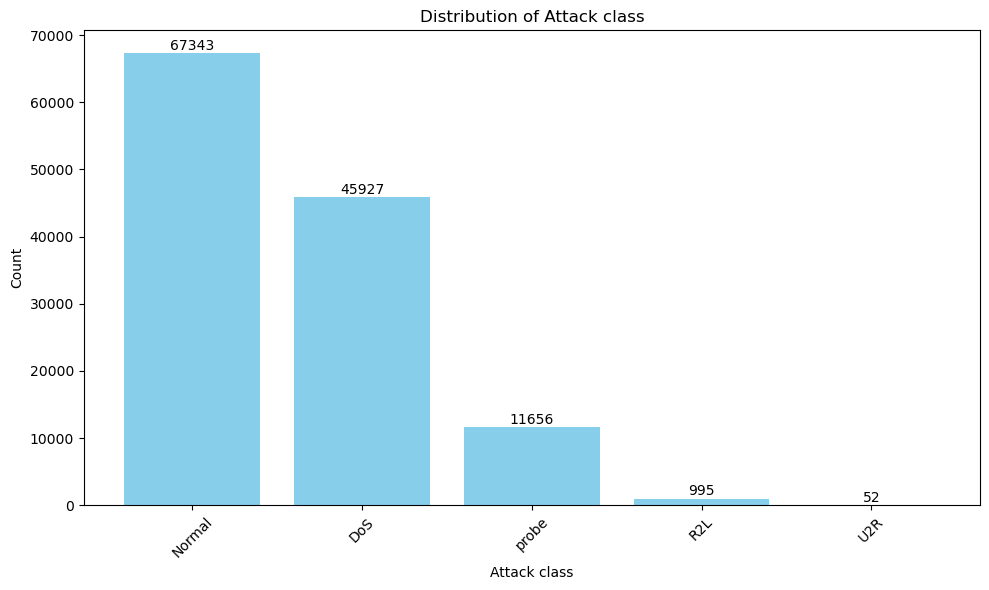

In [12]:
plt.figure(figsize=(10, 6))
plt.bar(class_counts.index, class_counts.values, color='skyblue')
plt.xlabel('Attack class')
plt.ylabel('Count')
plt.title('Distribution of Attack class')
plt.xticks(rotation=45)

# Display exact numbers on top of the bars
for i, count in enumerate(class_counts.values):
    plt.text(i, count + 10, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [12]:
#Manually label encoding for the 5 attack classes
Class = {'Normal': 0, 'DoS': 1, 'probe': 2, 'U2R': 3, 'R2L': 4}
data['attack_class'] = [Class[item] for item in data['attack_class']]
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_class,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,21


In [13]:
#Creating column 'attack_class' as Target Variable
X = data.drop('attack_class', axis=1)
Y = data['attack_class']

In [14]:
#Label encoding any categorical features in the X variable
def le(df):
    for col in X.columns:
        if X[col].dtype == 'object':
                label_encoder = LabelEncoder()
                X[col] = label_encoder.fit_transform(X[col])

le(X)

Feature Engineering - Selecting only Important Features using Random Forest Classifier

In [16]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, Y)
feature_importances = clf.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

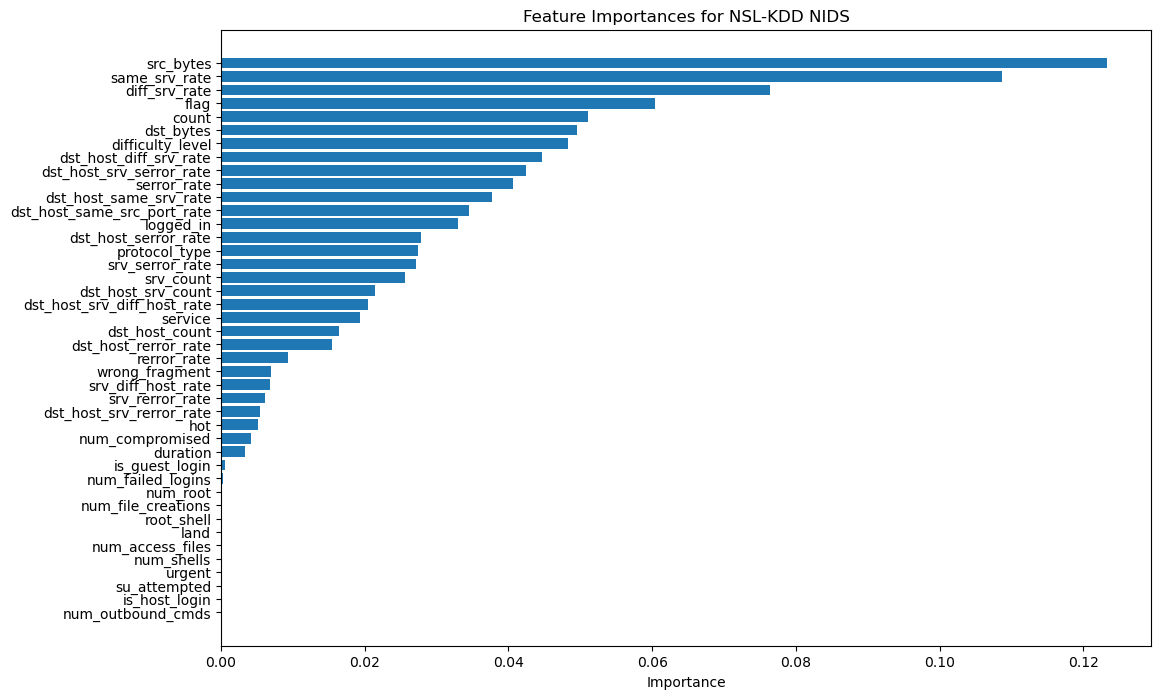

In [17]:
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances for NSL-KDD NIDS')
plt.gca().invert_yaxis()
plt.show()

In [16]:
#Dropping the Least important features as shown by the RFC
X.drop(['num_root', 'num_file_creations', 'root_shell', 'land', 'num_access_files', 'num_shells', 'urgent',
       'su_attempted', 'is_host_login', 'num_outbound_cmds', 'difficulty_level'],axis=1,inplace=True)
X.shape

KeyError: "['num_root', 'num_file_creations', 'root_shell', 'land', 'num_access_files', 'num_shells', 'urgent', 'su_attempted', 'is_host_login', 'num_outbound_cmds', 'difficulty_level'] not found in axis"

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=0)

Visualizing the distribution of the attack class in Train and Test sets

In [18]:
class_counts = y_train.value_counts()
print("0:Normal,  1:DoS,  2:Probe,  3:U2R,  4:R2L")
class_counts

0:Normal,  1:DoS,  2:Probe,  3:U2R,  4:R2L


0    47182
1    32199
2     8099
4      665
3       36
Name: attack_class, dtype: int64

In [19]:
counts_test = y_test.value_counts()
print("0:Normal,  1:DoS,  2:Probe,  3:U2R,  4:R2L")
counts_test

0:Normal,  1:DoS,  2:Probe,  3:U2R,  4:R2L


0    20161
1    13728
2     3557
4      330
3       16
Name: attack_class, dtype: int64

In [20]:
train_class_counts = y_train.value_counts()
test_class_counts = y_test.value_counts()

0:Normal,  1:DoS,  2:Probe,  3:U2R,  4:R2L


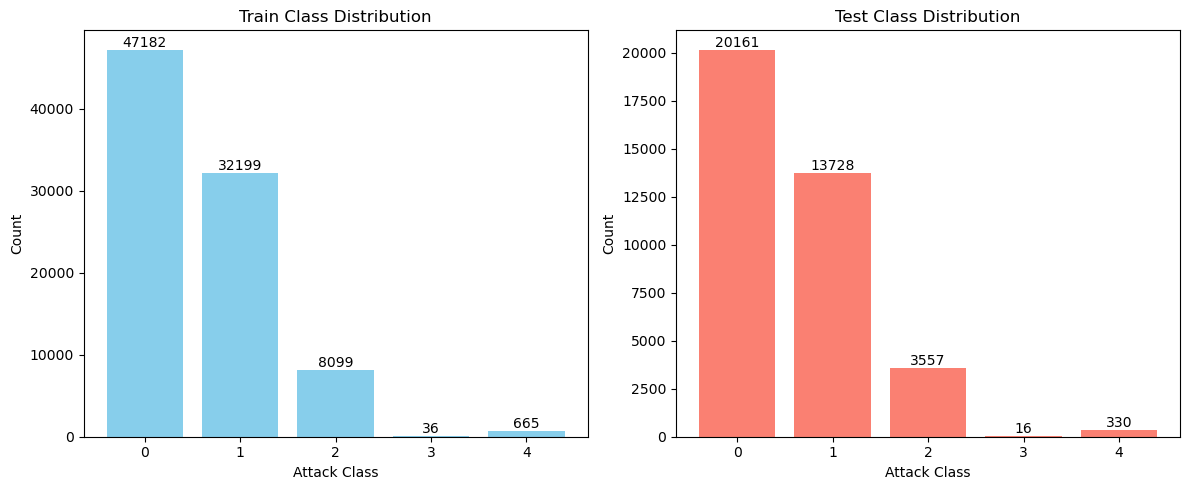

In [21]:
print("0:Normal,  1:DoS,  2:Probe,  3:U2R,  4:R2L")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
train_bars = ax1.bar(train_class_counts.index, train_class_counts.values, color='skyblue')
ax1.set_title('Train Class Distribution')
ax1.set_xlabel('Attack Class')
ax1.set_ylabel('Count')
for bar, count in zip(train_bars, train_class_counts.values):
    ax1.text(bar.get_x() + bar.get_width() / 2, count, str(count), ha='center', va='bottom')
    
# Plot the test class distribution
test_bars = ax2.bar(test_class_counts.index, test_class_counts.values, color='salmon')
ax2.set_title('Test Class Distribution')
ax2.set_xlabel('Attack Class')
ax2.set_ylabel('Count')
for bar, count in zip(test_bars, test_class_counts.values):
    ax2.text(bar.get_x() + bar.get_width() / 2, count, str(count), ha='center', va='bottom')
    
# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [19]:
X_train.shape

(88181, 31)

In [21]:
#Standard Scalling the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
X_train

array([[-0.10997327, -0.12431653,  0.29362358, ...,  1.6155178 ,
        -0.38566972, -0.37439942],
       [-0.10997327, -0.12431653, -0.44106857, ..., -0.62602034,
        -0.38566972, -0.37439942],
       [-0.10997327, -0.12431653, -0.44106857, ..., -0.62602034,
        -0.38566972, -0.37439942],
       ...,
       [ 1.75535803, -0.12431653,  0.78341834, ..., -0.62602034,
         2.88845643,  2.76757414],
       [-0.10997327, -0.12431653,  1.39566179, ..., -0.62602034,
        -0.38566972, -0.37439942],
       [-0.10997327, -0.12431653, -0.44106857, ..., -0.62602034,
        -0.38566972, -0.37439942]])

# DECISION TREE CLASSIFIER

In [21]:
model_dtc = DecisionTreeClassifier()
model_dtc.fit(X_train, y_train)
y_pred_dtc = model_dtc.predict(X_test)

In [59]:
print("***************DECISION TREE CLASSIFIER***************")

print("Training Accuracy  :", model_dtc.score(X_train, y_train))
print("Test Accuracy     :", model_dtc.score(X_test, y_test))

***************DECISION TREE CLASSIFIER***************
Training Accuracy  : 0.9999546387543802
Test Accuracy     : 0.9968247248094835


In [60]:
class_report = classification_report(y_test, y_pred_dtc)
print("Classification Report:\n", class_report)
print("0:Normal,  1:DoS,  2:Probe,  3:U2R,  4:R2L")

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     20161
           1       1.00      1.00      1.00     13728
           2       0.99      0.99      0.99      3557
           3       0.57      0.50      0.53        16
           4       0.94      0.93      0.94       330

    accuracy                           1.00     37792
   macro avg       0.90      0.88      0.89     37792
weighted avg       1.00      1.00      1.00     37792

0:Normal,  1:DoS,  2:Probe,  3:U2R,  4:R2L


In [61]:
dtc = DecisionTreeClassifier()
parameters_dtc = {
    'max_depth': [None, 10, 20],      # maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]     # The minimum number of samples required to be at a leaf node
}

In [62]:
grid_search_dtc = GridSearchCV(dtc, parameters_dtc, cv=5)
grid_search_dtc.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [63]:
def display(results):
    print(f'Best parameters: {results.best_params_}')
display(grid_search_dtc)

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [64]:
model_dtc_best = grid_search_dtc.best_estimator_
y_pred_dtc_best = model_dtc_best.predict(X_test)

print("DECISION TREE CLASSIFIER (Hyperparameters tuned):")

print("Training Accuracy   :", model_dtc_best.score(X_train, y_train))
print("Test Accuracy       :", model_dtc_best.score(X_test, y_test))

DECISION TREE CLASSIFIER (Hyperparameters tuned):
Training Accuracy   : 0.9990247332191742
Test Accuracy       : 0.9969041066892464


In [65]:
class_report = classification_report(y_test, y_pred_dtc_best)
print("Classification Report (Hyperparameters tuned):\n", class_report)
print("0:Normal,  1:DoS,  2:Probe,  3:U2R,  4:R2L")

Classification Report (Hyperparameters tuned):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     20161
           1       1.00      1.00      1.00     13728
           2       0.99      0.99      0.99      3557
           3       0.80      0.50      0.62        16
           4       0.96      0.92      0.94       330

    accuracy                           1.00     37792
   macro avg       0.95      0.88      0.91     37792
weighted avg       1.00      1.00      1.00     37792

0:Normal,  1:DoS,  2:Probe,  3:U2R,  4:R2L


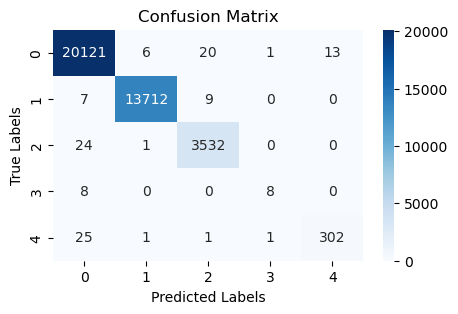

In [66]:
conf_matrix = confusion_matrix(y_test, y_pred_dtc_best)

plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# RANDOM FOREST CLASSIFIER

In [67]:
model_rfc = RandomForestClassifier()
model_rfc.fit(X_train, y_train)
y_pred_rfc = model_rfc.predict(X_test)

In [68]:
print("***************RANDOM FOREST CLASSIFIER***************")
print("Training Accuracy   :", model_rfc.score(X_train, y_train))
print("Test Accuracy       :", model_rfc.score(X_test, y_test))

***************RANDOM FOREST CLASSIFIER***************
Training Accuracy   : 0.9999546387543802
Test Accuracy       : 0.9990474174428451


In [69]:
class_report = classification_report(y_test, y_pred_rfc)
print("Classification Report:\n", class_report)
print("0:Normal,  1:DoS,  2:Probe,  3:U2R,  4:R2L")

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     20161
           1       1.00      1.00      1.00     13728
           2       1.00      1.00      1.00      3557
           3       0.85      0.69      0.76        16
           4       1.00      0.96      0.98       330

    accuracy                           1.00     37792
   macro avg       0.97      0.93      0.95     37792
weighted avg       1.00      1.00      1.00     37792

0:Normal,  1:DoS,  2:Probe,  3:U2R,  4:R2L


In [37]:
#HYPERPARAMETER TUNING

rfc = RandomForestClassifier()
parameters_rfc={
    "n_estimators":[5,10,50,100,250], #number of trees in the forest.
    "max_depth":[2,4,8,16,32,None]    #maximum depth of the tree
}

In [42]:
grid_search_rfc = GridSearchCV(rfc, parameters_rfc, cv=5)
grid_search_rfc.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'n_estimators': [5, 10, 50, 100, 250]})

In [72]:
def display(results):
    print(f'Best parameters: {results.best_params_}')
display(grid_search_rfc)

Best parameters: {'max_depth': None, 'n_estimators': 50}


In [73]:
model_rfc_best = grid_search_rfc.best_estimator_
y_pred_rfc_best = model_rfc_best.predict(X_test)

print("RANDOM FOREST CLASSIFIER (Hyperparameters tuned):")
print("Training Accuracy   :", model_rfc_best.score(X_train, y_train))
print("Test Accuracy       :", model_rfc_best.score(X_test, y_test))

RANDOM FOREST CLASSIFIER (Hyperparameters tuned):
Training Accuracy   : 0.9999432984429752
Test Accuracy       : 0.9988357324301439


In [74]:
class_report = classification_report(y_test, y_pred_rfc_best)
print("Classification Report (Hyperparameters tuned):\n", class_report)
print("0:Normal,  1:DoS,  2:Probe,  3:U2R,  4:R2L")

Classification Report (Hyperparameters tuned):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     20161
           1       1.00      1.00      1.00     13728
           2       1.00      1.00      1.00      3557
           3       0.85      0.69      0.76        16
           4       1.00      0.96      0.98       330

    accuracy                           1.00     37792
   macro avg       0.97      0.93      0.95     37792
weighted avg       1.00      1.00      1.00     37792

0:Normal,  1:DoS,  2:Probe,  3:U2R,  4:R2L


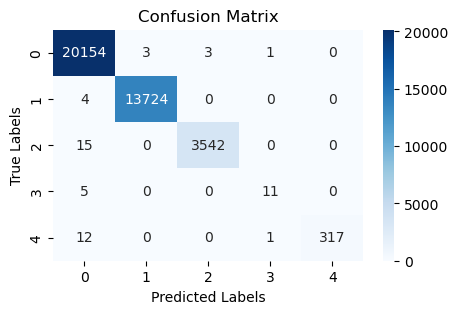

In [75]:
conf_matrix = confusion_matrix(y_test, y_pred_rfc_best)
#print("Confusion Matrix:\n", conf_matrix)

plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# SUPPORT VECTOR CLASSIFIER

In [64]:
model_svc = SVC(class_weight='balanced')
model_svc.fit(X_train, y_train)
y_pred_svc = model_svc.predict(X_test)

In [65]:
print("*********SUPPORT VECTOR CLASSIFIER*********")
print("Training Accuracy   :", model_svc.score(X_train, y_train))
print("Test Accuracy       :", model_svc.score(X_test, y_test))

*********SUPPORT VECTOR CLASSIFIER*********
Training Accuracy   : 0.9931164309771946
Test Accuracy       : 0.9914002963590178


In [66]:
class_report = classification_report(y_test, y_pred_svc)
print("Classification Report:\n", class_report)
print("0:Normal,  1:DoS,  2:Probe,  3:U2R,  4:R2L")

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     20161
           1       1.00      1.00      1.00     13728
           2       0.98      0.98      0.98      3557
           3       0.00      0.00      0.00        16
           4       0.87      0.78      0.82       330

    accuracy                           0.99     37792
   macro avg       0.77      0.75      0.76     37792
weighted avg       0.99      0.99      0.99     37792

0:Normal,  1:DoS,  2:Probe,  3:U2R,  4:R2L


C:\Users\Manish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Manish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Manish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


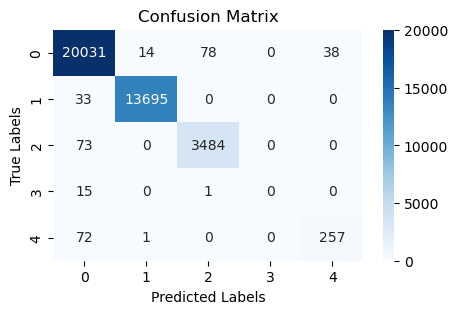

In [67]:
conf_matrix = confusion_matrix(y_test, y_pred_svc)
#print("Confusion Matrix:\n", conf_matrix)

plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [28]:
svc = SVC()
parameters_svc = {
    'C': [0.1, 1, 10],  #Regularization parameter. Low train-test error
    'kernel': ['linear', 'rbf', 'poly'], # kernel type to be used in the algorithm
    #'gamma': ['scale', 'auto'] # Kernel coefficient _ 1 / (n_features * X.var()).
}

In [ ]:
grid_search_svc = GridSearchCV(svc, parameters_svc, cv=5, n_jobs=2)
grid_search_svc.fit(X_train, y_train.values.ravel())

In [ ]:
def display(results):
    print(f'Best parameters: {results.best_params_}')

display(grid_search_svc)

In [ ]:
model_svc_best = grid_search_svc.best_estimator_
y_pred_svc_best = model_svc_best.predict(X_test)

print("SUPPORT VECTOR CLASSIFIER (Hyperparameters tuned):")

print("Training Score   ", model_svc_best.score(X_train, y_train))
print("Test Accuracy:   ", model_svc_best.score(X_test, y_test))
print("Model Accuracy:  ", accuracy_score(y_test, y_pred_svc_best))
print("precision Score: ", precision_score(y_test, y_pred_svc_best, average='micro'))
print("recall Score:    ", recall_score(y_test, y_pred_svc_best, average='micro'))
print("f1_score Score:  ", f1_score(y_test, y_pred_svc_best, average='micro'))

In [ ]:
class_report = classification_report(y_test, y_pred_svc_best)
print("Classification Report (Hyperparameters tuned):\n", class_report)
print("0:Normal,  1:DoS,  2:Probe,  3:U2R,  4:R2L")

# LOGISTIC REGRESSION

In [22]:
model_lrc = LogisticRegression(max_iter=1000)
model_lrc.fit(X_train, y_train)
y_pred_lrc = model_lrc.predict(X_test)

In [23]:
print("***************LOGISTIC REGRESSION***************")
print("Training Accuracy  :", model_lrc.score(X_train, y_train))
print("Test Accuracy      :", model_lrc.score(X_test, y_test))

***************LOGISTIC REGRESSION***************
Training Accuracy  : 0.9658996836053118
Test Accuracy      : 0.9639077053344624


In [24]:
class_report = classification_report(y_test, y_pred_lrc)
print("Classification Report:\n", class_report)
print("0:Normal,  1:DoS,  2:Probe,  3:U2R,  4:R2L")

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97     20161
           1       0.99      0.99      0.99     13728
           2       0.89      0.84      0.86      3557
           3       0.75      0.19      0.30        16
           4       0.70      0.65      0.68       330

    accuracy                           0.96     37792
   macro avg       0.86      0.73      0.76     37792
weighted avg       0.96      0.96      0.96     37792

0:Normal,  1:DoS,  2:Probe,  3:U2R,  4:R2L


In [31]:
#Hyperparameter tuning for Logistic Regression
lr = LogisticRegression(max_iter = 1000)
parameters_lr = {
    
    'C': [0.1, 1.0, 10.0], #Regularization Strength in reverse
    'class_weight': [None, 'balanced'] #Weight associated to each class
}

In [32]:
grid_search_lr = GridSearchCV(lr, parameters_lr, cv=5)
grid_search_lr.fit(X_train, y_train.values.ravel())

C:\Users\Manish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Manish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.1, 1.0, 10.0],
                         'class_weight': [None, 'balanced']})

In [33]:
def display(results):
    print(f'Best parameters: {results.best_params_}')
display(grid_search_lr)

Best parameters: {'C': 10.0, 'class_weight': None}


In [39]:
model_lr_best = grid_search_lr.best_estimator_
y_pred_lr_best = model_lr_best.predict(X_test)

print("LOGISTIC REGRESSION (Hyperparameters tuned):")
print("Training Accuracy   :", model_lr_best.score(X_train, y_train))
print("Test Accuracy       :", model_lr_best.score(X_test, y_test))

LOGISTIC REGRESSION (Hyperparameters tuned):
Training Accuracy   : 0.9670563953686169
Test Accuracy       : 0.9650190516511431


In [40]:
class_report = classification_report(y_test, y_pred_lr_best)
print("Classification Report (Hyperparameters tuned):\n", class_report)
print("0:Normal,  1:DoS,  2:Probe,  3:U2R,  4:R2L")

Classification Report (Hyperparameters tuned):
               precision    recall  f1-score   support

           0       0.96      0.97      0.97     20161
           1       0.99      0.99      0.99     13728
           2       0.89      0.84      0.86      3557
           3       0.57      0.25      0.35        16
           4       0.74      0.68      0.71       330

    accuracy                           0.97     37792
   macro avg       0.83      0.75      0.78     37792
weighted avg       0.96      0.97      0.96     37792

0:Normal,  1:DoS,  2:Probe,  3:U2R,  4:R2L


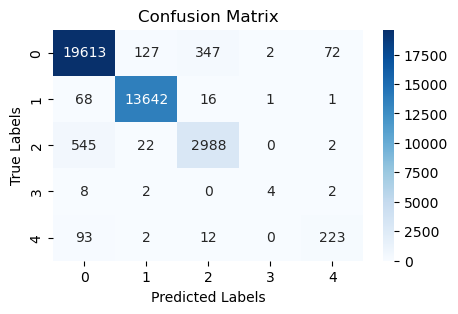

In [41]:
conf_matrix = confusion_matrix(y_test, y_pred_lr_best)

plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# K Nearest Neighbors

In [24]:
model_knc = KNeighborsClassifier()
model_knc.fit(X_train, y_train)
y_pred_knc = model_knc.predict(X_test)

C:\Users\Manish\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [25]:
print("**********K Nearest Neighbors Classifier:**********")
print("Training Accuracy   :", model_knc.score(X_train, y_train))
print("Test Accuracy       :", model_knc.score(X_test, y_test))

**********K Nearest Neighbors Classifier:**********


C:\Users\Manish\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Training Accuracy   : 0.9970288384119028


C:\Users\Manish\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Test Accuracy       : 0.9949724809483489


In [26]:
class_report = classification_report(y_test, y_pred_knc)
print("Classification Report:\n", class_report)
print("0:Normal,  1:DoS,  2:Probe,  3:U2R,  4:R2L")

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     20161
           1       1.00      1.00      1.00     13728
           2       0.99      0.98      0.99      3557
           3       0.62      0.31      0.42        16
           4       0.95      0.88      0.91       330

    accuracy                           0.99     37792
   macro avg       0.91      0.83      0.86     37792
weighted avg       0.99      0.99      0.99     37792

0:Normal,  1:DoS,  2:Probe,  3:U2R,  4:R2L


In [27]:
#Hyperparameter tuning for KNN
knn = KNeighborsClassifier()
parameters_knn = {
    'n_neighbors': [3, 5, 7], #number of neighbors to use for classification
    'weights': ['uniform', 'distance'], # The weight function used in prediction.
    'p': [1, 2]  #power parameter
}

In [28]:
grid_search_knn = GridSearchCV(knn, parameters_knn, cv=5)
grid_search_knn.fit(X_train, y_train.values.ravel())

C:\Users\Manish\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Manish\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [29]:
def display(results):
    print(f'Best parameters: {results.best_params_}')
display(grid_search_knn)

Best parameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


In [30]:
model_knn_best = grid_search_knn.best_estimator_
y_pred_knn_best = model_knn_best.predict(X_test)

print("K Nearest Neighbors Classifier (Hyperparameters tuned):")

print("Training Accuracy   :", model_knn_best.score(X_train, y_train))
print("Test Accuracy       :", model_knn_best.score(X_test, y_test))

K Nearest Neighbors Classifier (Hyperparameters tuned):
Training Accuracy   : 0.9999546387543802
Test Accuracy       : 0.9969041066892464


In [31]:
class_report = classification_report(y_test, y_pred_knn_best)
print("Classification Report (Hyperparameters tuned):\n", class_report)
print("0:Normal,  1:DoS,  2:Probe,  3:U2R,  4:R2L")

Classification Report (Hyperparameters tuned):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     20161
           1       1.00      1.00      1.00     13728
           2       0.99      0.99      0.99      3557
           3       0.60      0.38      0.46        16
           4       0.94      0.93      0.94       330

    accuracy                           1.00     37792
   macro avg       0.91      0.86      0.88     37792
weighted avg       1.00      1.00      1.00     37792

0:Normal,  1:DoS,  2:Probe,  3:U2R,  4:R2L


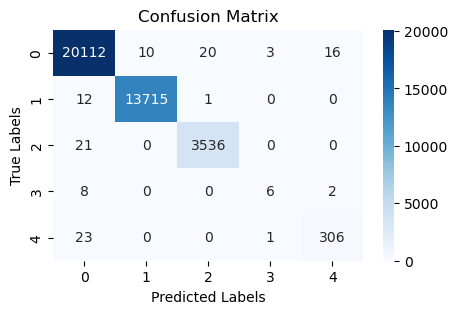

In [32]:
conf_matrix = confusion_matrix(y_test, y_pred_knn_best)

plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# CONVOLUTIONAL NEURAL NETWORK

In [21]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(88181, 31) (37792, 31)
(88181,) (37792,)


In [22]:
#CNN MODEL

inputs = Input(shape=(31, 1))
y = Conv1D(62, 3, padding="same", activation="relu", input_shape=(31,1))(inputs)
y = MaxPooling1D(pool_size=(2))(y)
y1 = Flatten()(y)

y = Dropout(0.5)(y)
y = Conv1D(62, 3, padding="same", activation="relu", input_shape=(31,1))(inputs)
y = MaxPooling1D(pool_size=(2))(y)
y2 = Flatten()(y)

y = Dropout(0.5)(y)
y = Conv1D(124, 3, padding="same", activation="relu", input_shape=(31,1))(inputs)
y = MaxPooling1D(pool_size=(2))(y)
y = Flatten()(y)
y = Dropout(0.5)(y)
y = Dense(256, activation="relu")(y)
y = Dropout(0.5)(y)
y = Dense(5, activation='softmax')(y)

y = Concatenate()([y, y1, y2])

outputs = Dense(5, activation='softmax')(y)
model_cnn = Model(inputs=inputs, outputs=outputs)

In [23]:
model_cnn.compile(loss ='sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [24]:
model_cnn.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 31, 1)]      0           []                               
                                                                                                  
 conv1d_2 (Conv1D)              (None, 31, 124)      496         ['input_1[0][0]']                
                                                                                                  
 max_pooling1d_2 (MaxPooling1D)  (None, 15, 124)     0           ['conv1d_2[0][0]']               
                                                                                                  
 flatten_2 (Flatten)            (None, 1860)         0           ['max_pooling1d_2[0][0]']        
                                                                                              

In [25]:
model_cnn.fit(X_train.reshape((-1,31,1)), y_train.values.ravel(), epochs=5, batch_size=32)

Epoch 1/5
2756/2756 [==============================] - 55s 19ms/step - loss: 0.0905 - accuracy: 0.9733
Epoch 2/5
2756/2756 [==============================] - 49s 18ms/step - loss: 0.0488 - accuracy: 0.9847
Epoch 3/5
2756/2756 [==============================] - 47s 17ms/step - loss: 0.0418 - accuracy: 0.9869
Epoch 4/5
2756/2756 [==============================] - 47s 17ms/step - loss: 0.0400 - accuracy: 0.9872
Epoch 5/5
2756/2756 [==============================] - 48s 17ms/step - loss: 0.0389 - accuracy: 0.9875


In [26]:
cnn_preds_train = model_cnn.predict(X_train.reshape((-1,31,1)))
y_pred_cnn = model_cnn.predict(X_test.reshape((-1,31,1)))

1181/1181 [==============================] - 6s 5ms/step


In [27]:
print("CONVOLUTIONAL NEURAL NETWORK")
print("Training Accuracy :", accuracy_score(y_train, np.argmax(cnn_preds_train, axis=1)))
print("Testing Accuracy  :", accuracy_score(y_test, np.argmax(y_pred_cnn, axis=1)))

CONVOLUTIONAL NEURAL NETWORK
Training Accuracy : 0.9896576359986845
Testing Accuracy  : 0.9880133361558001


In [28]:
model_cnn.save(r'C:\Documents\Documents\Germany\1SRH\Thesis\NIDSCNN\cnnmodelm.h5', overwrite=True)

In [29]:
model = load_model(r'C:\Documents\Documents\Germany\1SRH\Thesis\NIDSCNN\cnnmodelm.h5')

In [30]:
y_prediction_cnn = model.predict(X_test)
y_pred_classes = np.argmax(y_prediction_cnn, axis=1)

1181/1181 [==============================] - 5s 4ms/step


In [31]:
#Classification metrics CNN
print("CONVOLUTIONAL NEURAL NETWORK")
print(classification_report(y_test, y_pred_classes))
print("0:Normal,  1:DoS,  2:Probe,  3:U2R,  4:R2L")

CONVOLUTIONAL NEURAL NETWORK
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     20161
           1       1.00      1.00      1.00     13728
           2       0.97      0.97      0.97      3557
           3       0.71      0.31      0.43        16
           4       0.92      0.55      0.69       330

    accuracy                           0.99     37792
   macro avg       0.92      0.76      0.82     37792
weighted avg       0.99      0.99      0.99     37792

0:Normal,  1:DoS,  2:Probe,  3:U2R,  4:R2L


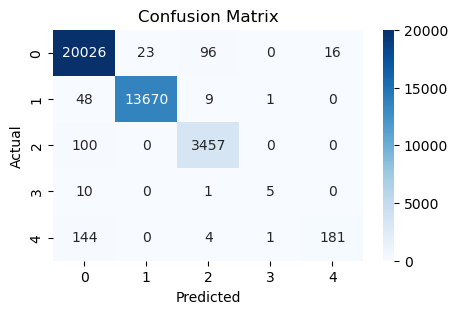

In [32]:
cm = confusion_matrix(y_test, y_pred_classes)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()